# Artificial Intelligence 

## Project - Gender Recognition from Acoustic Properties of Voice 

## Developed By: 

       Vrushank Shah

## Problem Formulation:

The aim of the project is to predict gender from acoustic properties of voice using machine learning and deep learning models like Logistic Regression, KNN, Naïve Bayes, Decision Tree, Random Forest, XGBoost, SVM, Neural Network, Multilayer Perceptron Network and CNN. This is a binary classification problem.

## Data Pre-Processing

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn import metrics
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [2]:
voice_data = pd.read_csv(r'C:\Users\16696\Desktop\AI_Final_Project\voice.csv')

In [3]:
voice_data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [4]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [5]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
print(voice_data.isnull().sum()) #Check for null values

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


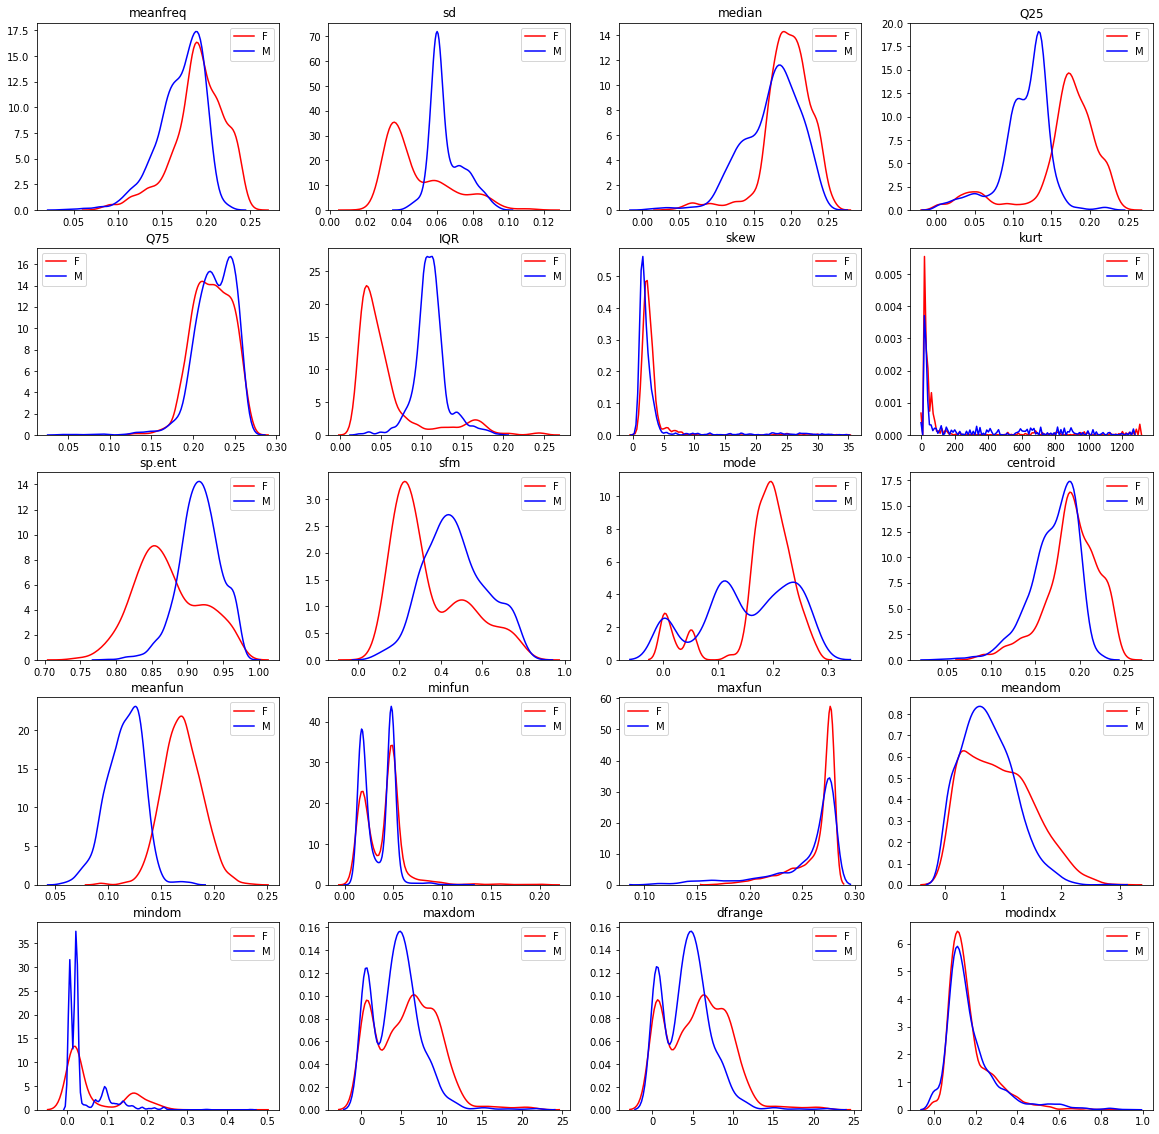

In [7]:
#Data Visualization
import seaborn as sns
plt.subplots(5,4,figsize=(20,20))
for i in range(1,21):
    plt.subplot(5,4,i)
    plt.title(voice_data.columns[i-1])
    sns.kdeplot(voice_data.loc[voice_data['label'] == 'female', voice_data.columns[i-1]], color= 'red', label='F')
    sns.kdeplot(voice_data.loc[voice_data['label'] == 'male', voice_data.columns[i-1]], color= 'blue', label='M')
plt.savefig(r'C:\Users\16696\Desktop\AI_Final_Project\test.png')

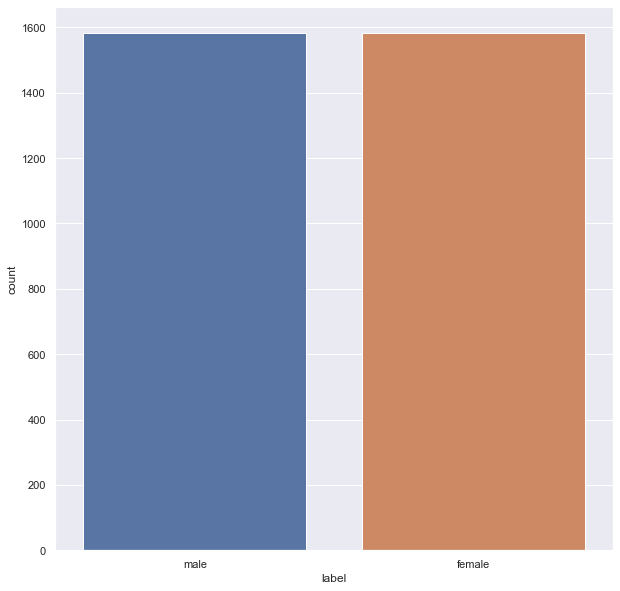

In [8]:
#Data Visualization - Checking for skewness of data
sns.set()
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(voice_data['label'])
plt.show()

In [9]:
#Finding IQR
Q1 = voice_data.quantile(0.25)
Q3 = voice_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

meanfreq    0.035484
sd          0.025067
median      0.041026
Q25         0.064852
Q75         0.034914
IQR         0.071615
skew        1.282125
kurt        7.979358
sp.ent      0.066902
sfm         0.275636
mode        0.103088
centroid    0.035484
meanfun     0.052582
minfun      0.029681
maxfun      0.023488
meandom     0.757338
mindom      0.062500
maxdom      4.937500
dfrange     4.947266
modindx     0.109417
dtype: float64


In [10]:
#Removing outliers using IQR
voice_data = voice_data[~((voice_data < (Q1 - 1.5 * IQR)) |(voice_data > (Q3 + 1.5 * IQR))).any(axis=1)]
voice_data.shape

(2147, 21)

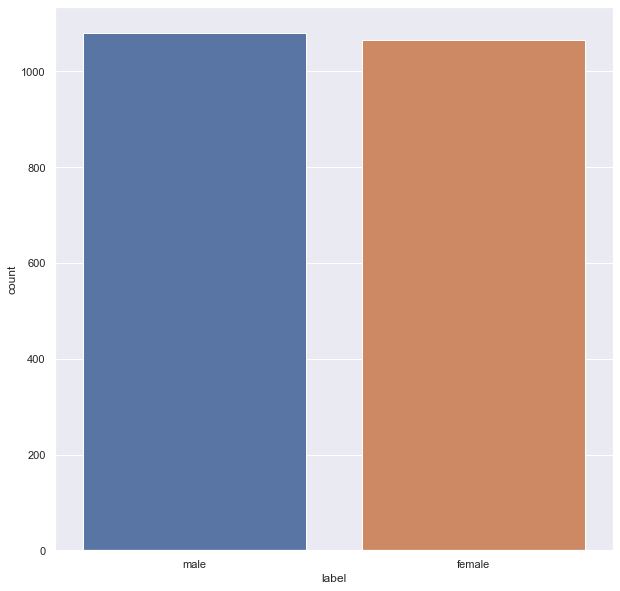

In [11]:
sns.set()
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(voice_data['label'])
plt.show()

In [12]:
#Label Encoding the target feature i.e. label
encode_text_index(voice_data,'label')

C:\Users\16696\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


array(['female', 'male'], dtype=object)

In [13]:
voice_data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,0.146023,0.092525,0.183434,0.041747,0.224337,0.182590,1.384981,5.118927,0.948999,0.659825,...,0.146023,0.195640,0.039506,0.275862,0.533854,0.007812,2.992188,2.984375,0.258924,0
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [14]:
voice_data.drop('Q25',axis=1,inplace=True)
voice_data.drop('Q75', axis=1,inplace=True)
voice_data.drop('IQR',axis=1,inplace=True)

C:\Users\16696\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
voice_data

,meanfreq,sd,median,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,0.146023,0.092525,0.183434,1.384981,5.118927,0.948999,0.659825,0.215482,0.146023,0.195640,0.039506,0.275862,0.533854,0.007812,2.992188,2.984375,0.258924,0
3163,0.131884,0.084734,0.153707,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3165,0.142056,0.095798,0.183731,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [16]:
#Normalizing the numeric values using z-score normalization
for column_name in voice_data.columns[0:17]:
    encode_numeric_zscore(voice_data, column_name)

C:\Users\16696\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
voice_data

,meanfreq,sd,median,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,-1.439009,1.093277,-1.207550,-1.219157,-0.977010,1.578569,1.927413,-1.579440,-1.439009,-1.949748,-1.399563,-1.317902,-1.523257,-0.691975,-1.759182,-1.748697,1.482659,1
4,-2.085903,1.550858,-2.350139,-1.410087,-0.941488,1.781232,2.250926,-1.260286,-2.085903,-1.346921,-1.458566,-0.141909,-0.439172,-0.691975,-0.079974,-0.070287,0.911377,1
5,-2.179637,1.577574,-2.540818,-0.204408,-0.038730,1.575256,1.991013,-1.130420,-2.179637,-1.217798,-1.446233,-1.037903,-1.318183,-0.691975,-1.020864,-1.010729,-0.310954,1
6,-1.457714,1.246289,-1.135778,-0.787271,-0.565916,1.678358,2.130732,-1.543136,-1.457714,-1.362597,-0.825291,-0.141909,-0.933585,-0.691975,-0.138613,-0.128898,-0.328128,1
8,-1.799999,1.477518,-1.872919,-1.412157,-1.001312,1.752305,2.178708,0.537874,-1.799999,-1.681268,-1.388679,-1.317902,-1.237076,-0.691975,-1.212773,-1.202548,0.028952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,-1.648034,2.420980,-0.336689,-0.998510,-0.763167,1.242315,1.540326,0.481174,-1.648034,1.739030,0.078938,0.506915,-0.818597,-0.691975,-0.930240,-0.920148,1.656274,0
3163,-2.215889,1.914292,-1.354979,-0.451571,-0.419917,1.569453,2.133857,0.251853,-2.215889,1.294679,3.093572,-0.450366,-0.184565,-0.691975,-0.514436,-0.504542,0.229796,0
3165,-1.807355,2.633903,-0.326498,-0.285707,-0.425793,1.191954,1.508004,-2.767430,-1.807355,2.232758,0.078938,0.506915,-0.902522,-0.691975,-0.948897,-0.938797,0.712613,0
3166,-1.742998,2.297642,-0.283853,-0.699647,-0.701993,1.276049,1.630167,0.429819,-1.742998,0.934546,-0.263190,-1.317902,-0.272635,-0.691975,-0.725003,-0.715010,2.422164,0


In [18]:
#Create a copy and drop 'label' to separate target feature from other feautures
voice_data_copy = voice_data.copy()
voice_data_copy.drop('label',axis=1,inplace=True)

In [19]:
voice_data_copy.head()

,meanfreq,sd,median,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
3,-1.439009,1.093277,-1.207550,-1.219157,-0.977010,1.578569,1.927413,-1.579440,-1.439009,-1.949748,-1.399563,-1.317902,-1.523257,-0.691975,-1.759182,-1.748697,1.482659
4,-2.085903,1.550858,-2.350139,-1.410087,-0.941488,1.781232,2.250926,-1.260286,-2.085903,-1.346921,-1.458566,-0.141909,-0.439172,-0.691975,-0.079974,-0.070287,0.911377
5,-2.179637,1.577574,-2.540818,-0.204408,-0.038730,1.575256,1.991013,-1.130420,-2.179637,-1.217798,-1.446233,-1.037903,-1.318183,-0.691975,-1.020864,-1.010729,-0.310954
6,-1.457714,1.246289,-1.135778,-0.787271,-0.565916,1.678358,2.130732,-1.543136,-1.457714,-1.362597,-0.825291,-0.141909,-0.933585,-0.691975,-0.138613,-0.128898,-0.328128
8,-1.799999,1.477518,-1.872919,-1.412157,-1.001312,1.752305,2.178708,0.537874,-1.799999,-1.681268,-1.388679,-1.317902,-1.237076,-0.691975,-1.212773,-1.202548,0.028952


In [20]:
voice_data.head()

,meanfreq,sd,median,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,-1.439009,1.093277,-1.207550,-1.219157,-0.977010,1.578569,1.927413,-1.579440,-1.439009,-1.949748,-1.399563,-1.317902,-1.523257,-0.691975,-1.759182,-1.748697,1.482659,1
4,-2.085903,1.550858,-2.350139,-1.410087,-0.941488,1.781232,2.250926,-1.260286,-2.085903,-1.346921,-1.458566,-0.141909,-0.439172,-0.691975,-0.079974,-0.070287,0.911377,1
5,-2.179637,1.577574,-2.540818,-0.204408,-0.038730,1.575256,1.991013,-1.130420,-2.179637,-1.217798,-1.446233,-1.037903,-1.318183,-0.691975,-1.020864,-1.010729,-0.310954,1
6,-1.457714,1.246289,-1.135778,-0.787271,-0.565916,1.678358,2.130732,-1.543136,-1.457714,-1.362597,-0.825291,-0.141909,-0.933585,-0.691975,-0.138613,-0.128898,-0.328128,1
8,-1.799999,1.477518,-1.872919,-1.412157,-1.001312,1.752305,2.178708,0.537874,-1.799999,-1.681268,-1.388679,-1.317902,-1.237076,-0.691975,-1.212773,-1.202548,0.028952,1


In [21]:
#Create variables x and y for the train_test_split function
x = voice_data_copy
y = voice_data['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
x_train

,meanfreq,sd,median,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2141,-0.117082,-1.307290,-0.161001,0.331302,0.027839,-0.982261,-0.813936,0.138455,-0.117082,0.394971,-1.415529,-1.852444,-0.454190,2.938166,0.437115,0.395938,-0.494301
1725,-1.401019,1.134779,-1.477912,0.404963,0.201219,0.890711,1.086299,-0.546995,-1.401019,-0.689275,-1.513200,-0.450366,-0.884253,-0.691975,0.437115,0.446556,-1.096286
1272,0.153742,0.396625,0.199431,-1.163448,-0.984992,0.352394,-0.138383,-0.848094,0.153742,-0.852274,0.590184,0.619428,-0.747632,-0.309855,-1.231431,-1.226525,-1.184652
939,0.392771,0.421907,1.149500,0.174813,0.026138,-0.659866,-0.697280,1.019857,0.392771,-0.899562,1.065604,-1.938401,-0.399478,-0.309855,-0.479785,-0.475237,-0.825622
1137,0.184287,0.407552,0.200346,-1.396277,-1.178346,0.522008,0.277712,1.199102,0.184287,-0.184518,0.895943,0.733249,0.652543,-0.309855,1.047494,1.051317,-0.476847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,1.318745,-1.103929,0.711357,0.276907,-0.089407,-1.236026,-1.071352,0.363799,1.318745,1.131399,0.815054,0.733249,1.180124,-0.309855,0.871577,0.875483,-0.358663
1599,0.418341,-0.883731,0.015008,-0.057376,-0.087385,0.058768,-0.698438,-0.110525,0.418341,1.426775,-1.488286,0.506915,-1.236713,-0.691975,-1.724532,-1.714063,1.958117
1655,-1.993305,1.816073,-0.642144,0.009496,-0.178925,0.940845,1.281813,0.138083,-1.993305,0.639396,1.928747,-2.107748,-0.431315,-0.691975,-0.927574,-0.917484,1.246638
1900,0.348598,1.087333,0.498416,0.843323,1.376612,0.459296,0.460686,-2.108116,0.348598,1.267760,-1.364891,0.506915,-1.398762,0.454386,-1.684550,-1.690086,1.943255


In [23]:
x_test

,meanfreq,sd,median,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1706,2.144514,0.061092,2.197642,1.678020,1.357214,-1.712771,-1.074486,1.343674,2.144514,1.763475,-1.246148,0.506915,-0.769458,-0.691975,-0.178594,-0.168860,-0.999906
2862,1.904675,-1.358491,1.627196,0.404458,-0.074515,-1.929745,-1.292037,0.932888,1.904675,1.166908,1.111675,0.506915,1.821891,-0.309855,1.039498,1.043324,0.379095
1407,1.073733,0.255712,1.432820,-0.145514,-0.377036,-0.794369,-1.129917,1.426801,1.073733,-0.713458,0.612288,0.395688,-0.153654,-0.309855,-0.255891,-0.251449,-0.857936
1185,0.678540,0.417339,1.279431,-0.240213,-0.516017,-0.805562,-0.917661,1.337998,0.678540,-0.553147,0.590184,0.619428,1.720047,-0.309855,1.847117,1.850559,-0.871306
1301,-0.200381,0.167515,-0.045458,-0.430526,-0.539936,0.068867,-0.343924,0.018207,-0.200381,-0.591790,0.583925,0.733249,0.446627,-0.309855,-0.215910,-0.211487,0.083301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.513473,0.163605,-0.070292,-0.204351,-0.085317,0.514853,-0.134996,0.228049,-0.513473,-0.977816,0.647646,0.733249,-0.265544,-0.309855,-0.127951,-0.123570,-0.989277
2967,-0.823210,0.134957,-1.157487,1.355493,1.207805,0.331955,0.580541,-0.390024,-0.823210,-0.133459,-1.281487,-2.921529,-0.864321,-0.763622,-1.486311,-1.474956,3.156158
1098,0.122784,0.136586,0.595900,-0.342792,-0.264624,0.071565,-0.375336,0.632414,0.122784,-0.492748,0.593323,0.619428,-0.294879,-0.309855,-0.535759,-0.531184,-0.427898
2546,0.539557,-1.436419,0.437143,0.459172,0.043886,-1.202850,-0.959283,0.576324,0.539557,0.615257,0.825864,0.395688,1.850966,-0.309855,1.631219,1.634764,-0.360153


In [24]:
y_train

2141    0
1725    0
1272    1
939     1
1137    1
       ..
2384    0
1599    0
1655    0
1900    0
1287    1
Name: label, Length: 1502, dtype: int32

In [25]:
y_test

1706    0
2862    0
1407    1
1185    1
1301    1
       ..
835     1
2967    0
1098    1
2546    0
2269    0
Name: label, Length: 645, dtype: int32

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train.values, y_train.values)

# predict the response for new observations
y_predict = logreg.predict(x_test.values)
y_predict

C:\Users\16696\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [27]:
logreg.coef_

array([[ 0.10366338,  2.48187962, -0.23600989, -0.58374572,  0.21948163,
         0.84751703, -1.87541679,  0.0963681 ,  0.10366338, -4.20672479,
         0.82600528,  0.07796235,  0.33548767,  0.10302273, -0.11099188,
        -0.11237565, -0.00821141]])

In [28]:
#Calculating Feature Importance
features = voice_data.columns
importances = logreg.coef_[0]
indices = np.argsort(importances)
importances

array([ 0.10366338,  2.48187962, -0.23600989, -0.58374572,  0.21948163,
        0.84751703, -1.87541679,  0.0963681 ,  0.10366338, -4.20672479,
        0.82600528,  0.07796235,  0.33548767,  0.10302273, -0.11099188,
       -0.11237565, -0.00821141])

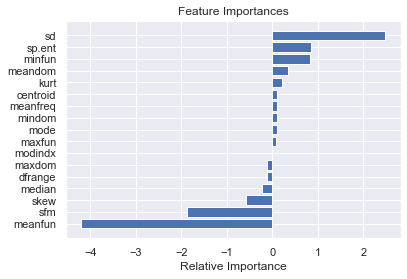

In [29]:
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[[310   9]
 [  6 320]]


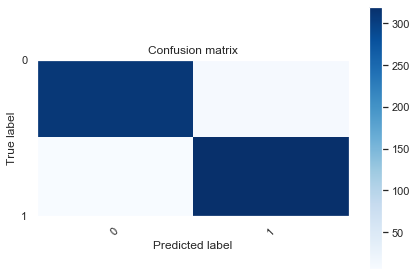

In [30]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,y_predict)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

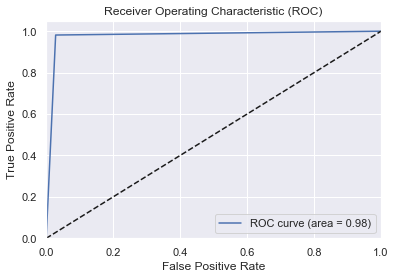

In [31]:
#Plot ROC curve
plot_roc(y_predict, y_test)

In [32]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9767441860465116


In [33]:
#Calculate Precision
score = metrics.precision_score(y_test, y_predict, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.9767831082852474


In [34]:
#Calculate Recall
score = metrics.recall_score(y_test, y_predict, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9767441860465116


In [35]:
#Calculate F1 Score
score = metrics.f1_score(y_test, y_predict, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.9767425086421272


In [36]:
#Calculate Classification Report
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       319
           1       0.97      0.98      0.98       326

    accuracy                           0.98       645
   macro avg       0.98      0.98      0.98       645
weighted avg       0.98      0.98      0.98       645



## K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_predict_knn = knn.predict(x_test)
        error_rate.append(np.mean(y_predict_knn != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.027906976744186046 occurs at k=12.


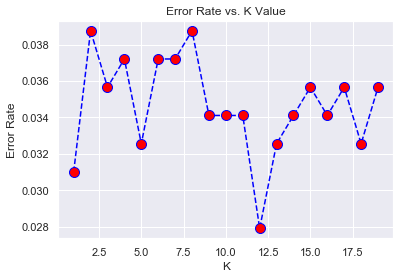

In [38]:
k=knn_error(20,x_train,y_train,x_test,y_test)

In [39]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors = k)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [40]:
y_predict_knn = model_knn.predict(x_test)
y_predict_knn

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

[[308  11]
 [  7 319]]


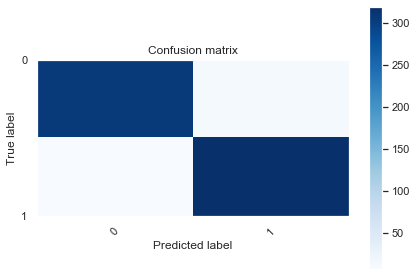

In [41]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,y_predict_knn)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

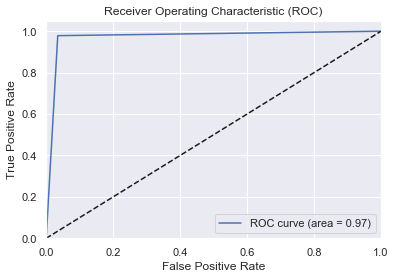

In [42]:
#Plot ROC curve
plot_roc(y_predict_knn, y_test)

In [43]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, y_predict_knn)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9720930232558139


In [44]:
#Calculate Precision
score = metrics.precision_score(y_test, y_predict_knn, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.9721619293712318


In [45]:
#Calculate Recall
score = metrics.recall_score(y_test, y_predict_knn, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9720930232558139


In [46]:
#Calculate F1 Score
score = metrics.f1_score(y_test, y_predict_knn, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.9720900708750322


In [47]:
#Calculate Classification Report
print(metrics.classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       319
           1       0.97      0.98      0.97       326

    accuracy                           0.97       645
   macro avg       0.97      0.97      0.97       645
weighted avg       0.97      0.97      0.97       645



## Naive Bayes

In [48]:
from sklearn import naive_bayes
model_naive = naive_bayes.GaussianNB()

In [49]:
model_naive.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
y_predict_naive = model_naive.predict(x_test)
y_predict_naive

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

[[293  26]
 [ 20 306]]


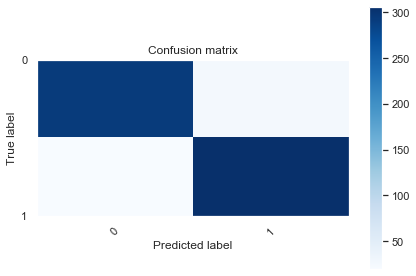

In [51]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,y_predict_naive)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

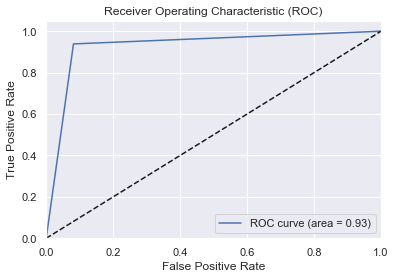

In [52]:
#Plot ROC curve
plot_roc(y_predict_naive, y_test)

In [53]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, y_predict_naive)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9286821705426357


In [54]:
#Calculate Precision
score = metrics.precision_score(y_test, y_predict_naive, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.9288162681187636


In [55]:
#Calculate Recall
score = metrics.recall_score(y_test, y_predict_naive, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9286821705426357


In [56]:
#Calculate F1 Score
score = metrics.f1_score(y_test, y_predict_naive, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.9286687938192082


In [57]:
#Calculate Classification Report
print(metrics.classification_report(y_test,y_predict_naive))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       319
           1       0.92      0.94      0.93       326

    accuracy                           0.93       645
   macro avg       0.93      0.93      0.93       645
weighted avg       0.93      0.93      0.93       645



## Decision Tree

In [58]:
from sklearn import tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_predict_dtree = model.predict(x_test)
        error_rate.append(np.mean(y_predict_dtree != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.02635658914728682 occurs at n=9.


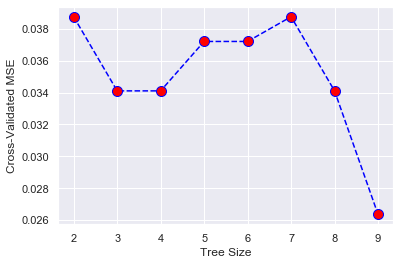

In [59]:
n = dt_error(10,x_train,y_train,x_test,y_test)

In [60]:
model_dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)

In [61]:
model_dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
y_predict_dtree = model_dtree.predict(x_test)
y_predict_dtree

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [63]:
#Calculating Feature Importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model_dtree.feature_importances_,10)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
9,meanfun,0.921956
1,sd,0.045020
8,centroid,0.015977
10,minfun,0.009128
3,skew,0.007919
15,dfrange,0.000000
14,maxdom,0.000000
13,mindom,0.000000
12,meandom,0.000000
11,maxfun,0.000000


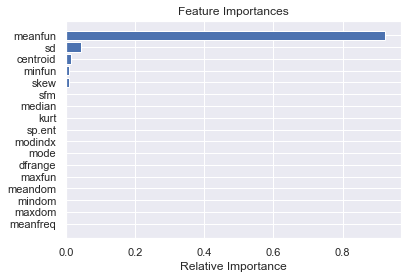

In [64]:
features = voice_data.columns
importances = model_dtree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[[311   8]
 [  9 317]]


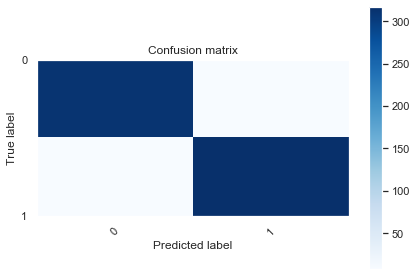

In [65]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,y_predict_dtree)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

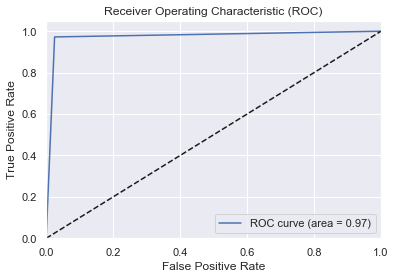

In [66]:
#Plot ROC curve
plot_roc(y_predict_dtree, y_test)

In [67]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, y_predict_dtree)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9736434108527132


In [68]:
#Calculate Precision
score = metrics.precision_score(y_test, y_predict_dtree, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.9736488521168754


In [69]:
#Calculate Recall
score = metrics.recall_score(y_test, y_predict_dtree, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9736434108527132


In [70]:
#Calculate F1 Score
score = metrics.f1_score(y_test, y_predict_dtree, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.973643791005878


In [71]:
#Calculate Classification Report
print(metrics.classification_report(y_test,y_predict_dtree))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       319
           1       0.98      0.97      0.97       326

    accuracy                           0.97       645
   macro avg       0.97      0.97      0.97       645
weighted avg       0.97      0.97      0.97       645



## Random Forest

In [72]:
from sklearn import ensemble
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_predict_rforest = model.predict(x_test)
        error_rate.append(np.mean(y_predict_rforest != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.017054263565891473 occurs at n=41.


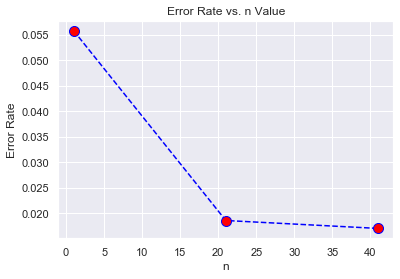

In [73]:
e = rf_error(50,x_train,y_train,x_test,y_test)

In [74]:
model_rforest = ensemble.RandomForestClassifier(n_estimators = e)

In [75]:
model_rforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_predict_rforest = model_rforest.predict(x_test)
y_predict_rforest

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [77]:
#Calculating Feature Importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model_rforest.feature_importances_,10)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
9,meanfun,0.521814
1,sd,0.132587
5,sp.ent,0.063920
6,sfm,0.059537
7,mode,0.031519
8,centroid,0.029765
0,meanfreq,0.025953
3,skew,0.019414
2,median,0.019081
10,minfun,0.018466


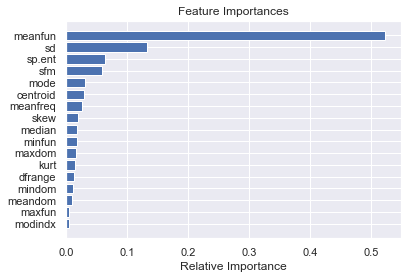

In [78]:
features = voice_data.columns
importances = model_rforest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[[313   6]
 [  5 321]]


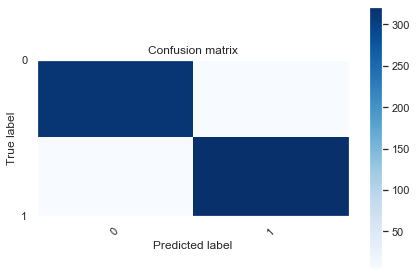

In [79]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,y_predict_rforest)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

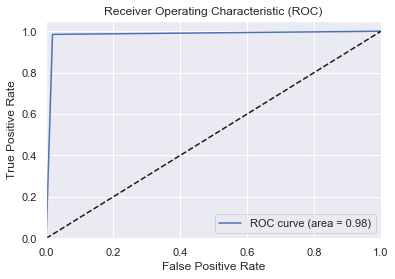

In [80]:
#Plot ROC curve
plot_roc(y_predict_rforest, y_test)

In [81]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, y_predict_rforest)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9829457364341085


In [82]:
#Calculate Precision
score = metrics.precision_score(y_test, y_predict_rforest, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.9829498067494774


In [83]:
#Calculate Recall
score = metrics.recall_score(y_test, y_predict_rforest, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9829457364341085


In [84]:
#Calculate F1 Score
score = metrics.f1_score(y_test, y_predict_rforest, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.9829454084367517


In [85]:
#Calculate Classification Report
print(metrics.classification_report(y_test,y_predict_rforest))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       319
           1       0.98      0.98      0.98       326

    accuracy                           0.98       645
   macro avg       0.98      0.98      0.98       645
weighted avg       0.98      0.98      0.98       645



## XGBoost

In [86]:
import xgboost
model_xgboost = xgboost.XGBClassifier()

In [87]:
model_xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [88]:
y_predict_xgboost = model_xgboost.predict(x_test)
y_predict_xgboost

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [89]:
#Calculating Feature Importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model_xgboost.feature_importances_,10)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
9,meanfun,0.645074
1,sd,0.052055
10,minfun,0.034833
13,mindom,0.032520
14,maxdom,0.030498
3,skew,0.027538
0,meanfreq,0.025186
6,sfm,0.021623
5,sp.ent,0.021475
15,dfrange,0.018933


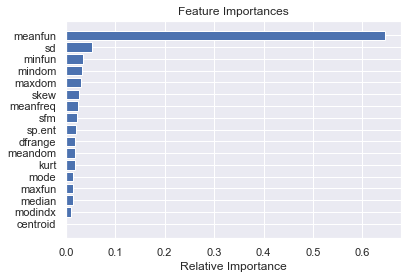

In [90]:
features = voice_data.columns
importances = model_xgboost.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[[316   3]
 [  5 321]]


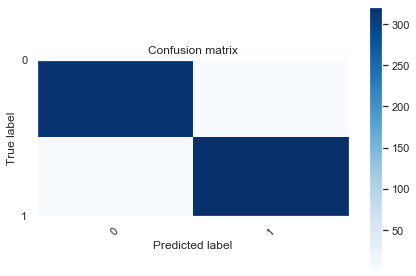

In [91]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,y_predict_xgboost)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

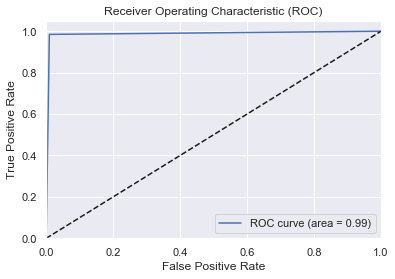

In [92]:
#Plot ROC curve
plot_roc(y_predict_xgboost, y_test)

In [93]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, y_predict_xgboost)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9875968992248062


In [94]:
#Calculate Precision
score = metrics.precision_score(y_test, y_predict_xgboost, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.9876164870224132


In [95]:
#Calculate Recall
score = metrics.recall_score(y_test, y_predict_xgboost, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9875968992248062


In [96]:
#Calculate F1 Score
score = metrics.f1_score(y_test, y_predict_xgboost, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.987597197376267


In [97]:
#Calculate Classification Report
print(metrics.classification_report(y_test,y_predict_xgboost))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       319
           1       0.99      0.98      0.99       326

    accuracy                           0.99       645
   macro avg       0.99      0.99      0.99       645
weighted avg       0.99      0.99      0.99       645



## SVM

In [98]:
from sklearn import svm
from sklearn.metrics import accuracy_score
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model_svm = svm.SVC(kernel=i).fit(x_train,y_train)
        #y_pred=model.predict(x_train)
        #print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_predict_svm = model_svm.predict(x_test)
        print(i, ' Accuracy in SVM: ', accuracy_score(y_test,y_predict_svm))
        rate.append(accuracy_score(y_test,y_predict_svm))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs with %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [99]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model_svm = svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model_svm.fit(x_train, y_train)
        y_predict_svm = model_svm.predict(x_test)
        error_rate.append(np.mean(y_predict_svm != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [100]:
import warnings
warnings.filterwarnings('ignore')

k = svm_kernel(x_train,y_train,x_test,y_test)

rbf  Accuracy in SVM:  0.9844961240310077
poly  Accuracy in SVM:  0.9565891472868217
linear  Accuracy in SVM:  0.9767441860465116
Highest accuracy is 0.9844961240310077 occurs with rbf kernel.


Lowest error is 0.015503875968992248 occurs at C=1.


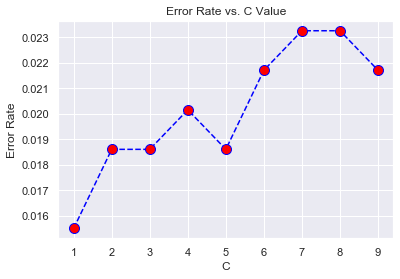

In [101]:
import warnings
warnings.filterwarnings('ignore')

c = svm_error(k,10,x_train,y_train,x_test,y_test)

In [102]:
model_svm = svm.SVC(kernel=k,C=c)

In [103]:
model_svm.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
y_predict_svm = model_svm.predict(x_test)
y_predict_svm

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

[[315   4]
 [  6 320]]


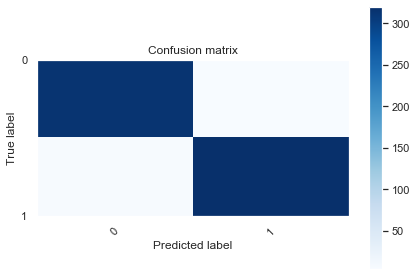

In [105]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,y_predict_svm)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

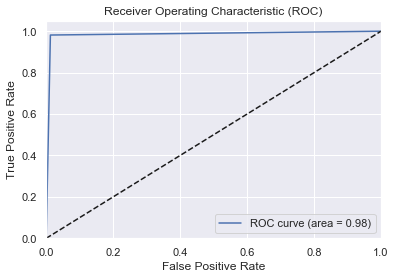

In [106]:
#Plot ROC curve
plot_roc(y_predict_svm, y_test)

In [107]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, y_predict_svm)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9844961240310077


In [108]:
#Calculate Precision
score = metrics.precision_score(y_test, y_predict_svm, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.984515801270613


In [109]:
#Calculate Recall
score = metrics.recall_score(y_test, y_predict_svm, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9844961240310077


In [110]:
#Calculate F1 Score
score = metrics.f1_score(y_test, y_predict_svm, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.9844964967203339


In [111]:
#Calculate Classification Report
print(metrics.classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       319
           1       0.99      0.98      0.98       326

    accuracy                           0.98       645
   macro avg       0.98      0.98      0.98       645
weighted avg       0.98      0.98      0.98       645



## MLP

In [112]:
from sklearn import neural_network
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model_mlp = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model_mlp.fit(x_train, y_train)
        y_predict_mlp = model_mlp.predict(x_test)
        error_rate.append(np.mean(y_predict_mlp != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.017054263565891473 occurs at C=6.


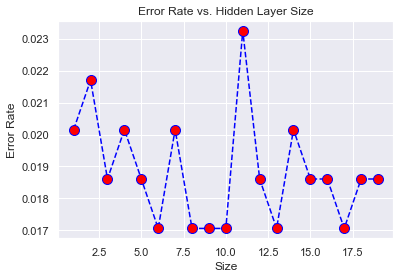

In [113]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [114]:
model_mlp = neural_network.MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=h, activation='logistic',random_state=17, max_iter=2000)

In [115]:
model_mlp.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=17, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [116]:
y_predict_mlp = model_mlp.predict(x_test)
y_predict_mlp

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

[[313   6]
 [  5 321]]


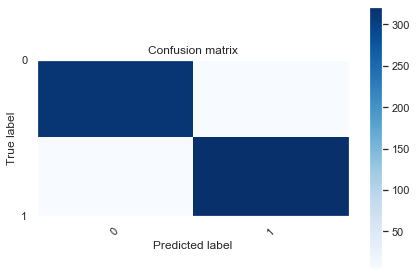

In [117]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,y_predict_mlp)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

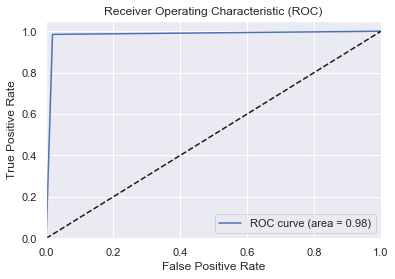

In [118]:
#Plot ROC curve
plot_roc(y_predict_mlp, y_test)

In [119]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, y_predict_mlp)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9829457364341085


In [120]:
#Calculate Precision
score = metrics.precision_score(y_test, y_predict_mlp, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.9829498067494774


In [121]:
#Calculate Recall
score = metrics.recall_score(y_test, y_predict_mlp, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9829457364341085


In [122]:
#Calculate F1 Score
score = metrics.f1_score(y_test, y_predict_mlp, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.9829454084367517


In [123]:
#Calculate Classification Report
print(metrics.classification_report(y_test,y_predict_mlp))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       319
           1       0.98      0.98      0.98       326

    accuracy                           0.98       645
   macro avg       0.98      0.98      0.98       645
weighted avg       0.98      0.98      0.98       645



## Neural Network

In [124]:
import os
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [125]:
x_train.values.astype(np.float32)
x_test.values.astype(np.float32)

array([[ 2.1445136 ,  0.06109206,  2.1976418 , ..., -0.17859419,
        -0.16886038, -0.999906  ],
       [ 1.9046749 , -1.3584914 ,  1.6271957 , ...,  1.0394979 ,
         1.0433242 ,  0.37909493],
       [ 1.0737329 ,  0.25571227,  1.4328195 , ..., -0.25589105,
        -0.25144878, -0.8579362 ],
       ...,
       [ 0.12278372,  0.13658623,  0.5959005 , ..., -0.53575903,
        -0.5311837 , -0.42789844],
       [ 0.53955716, -1.4364191 ,  0.43714264, ...,  1.6312188 ,
         1.6347638 , -0.36015263],
       [ 1.6255897 , -1.01311   ,  1.3902104 , ...,  1.3833357 ,
         1.3869987 , -1.1314586 ]], dtype=float32)

In [126]:
#Converts a class vector (integers) to binary class matrix.
#This function takes a vector or 1 column matrix of class labels and converts it into a matrix with p columns, one for each category. This is the format most commonly used in the fitting and predicting of neural networks.
y_train_neural = to_categorical(y_train)             
y_test_neural = to_categorical(y_test)    

In [127]:
y_train_neural.shape

(1502, 2)

In [128]:
y_train_neural

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [129]:
y_test_neural.shape

(645, 2)

In [130]:
y_test_neural

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Neural Network with 'relu' as activation function and 'sgd' as optimizer

In [131]:
checkpointer = ModelCheckpoint(filepath=r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_1.hdf5', verbose=0, save_best_only=True)


model = Sequential()
model.add(Dense(68, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(34,activation='relu'))
model.add(Dense(34,activation='relu'))
model.add(Dense(y_train_neural.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    
model.fit(x_train, y_train_neural, validation_data=(x_test,y_test_neural),callbacks=[monitor,checkpointer],verbose=2,epochs=500)

print('Training finished...Loading the best model')  
print()
model.load_weights(r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_1.hdf5')

# Measure accuracy
predict_neural = model.predict(x_test)
predict_neural = np.argmax(predict_neural,axis=1)

y_true = np.argmax(y_test_neural,axis=1)

score = metrics.accuracy_score(y_true, predict_neural)
print("Final accuracy: {}".format(score))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 1502 samples, validate on 645 samples
Epoch 1/500
1502/1502 - 1s - loss: 0.6283 - val_loss: 0.5600
Epoch 2/500
1502/1502 - 1s - loss: 0.5189 - val_loss: 0.4595
Epoch 3/500
1502/1502 - 1s - loss: 0.4259 - val_loss: 0.3716
Epoch 4/500
1502/1502 - 0s - loss: 0.3458 - val_loss: 0.2974
Epoch 5/500
1502/1502 - 0s - loss: 0.2807 - val_loss: 0.2402
Epoch 6/500
1502/1502 - 1s - loss: 0.2327 - val_loss: 0.1976
Epoch 7/500
1502/1502 - 0s - loss: 0.1980 - val_loss: 0.1670
Epoch 8/500
1502/1502 - 1s - loss: 0.1731 - val_loss: 0.1452
Epoch 9/500
1502/1502 - 1s - loss: 0.1553 - val_loss: 0.1291
Epoch 10/500
1502/1502 - 0s - loss: 0.1419 - val_loss: 0.1173
Epoch 11/500
1502/1502 - 0s - loss: 0.1320 - val_loss: 0.1075
Epoch 12/500
1502/1502 - 0s - loss: 0.1239 - val_loss: 0.1002
Epoch 13/500
1502/1502 - 0s - loss: 0.1180 - val_loss: 0.0943
Epoch 14/500
1502/1502 - 0s - loss: 0.1124 - val_loss: 0.0895
Epoch 15/500


[[313   6]
 [  5 321]]


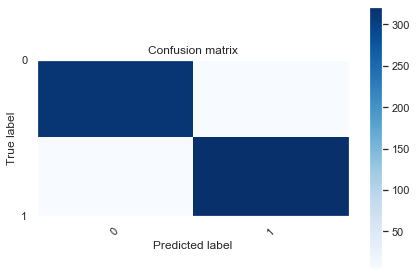

In [132]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_true,predict_neural)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

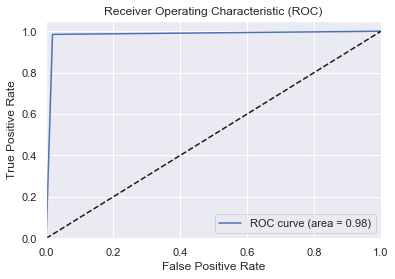

In [133]:
#Plot ROC Curve
plot_roc(predict_neural,y_true)

In [134]:
#Calculate Accuracy
score = metrics.accuracy_score(y_true, predict_neural)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9829457364341085


In [135]:
#Calculate Recall
score = metrics.recall_score(y_true, predict_neural, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9829457364341085


In [136]:
#Calculate Precision
score = metrics.precision_score(y_true, predict_neural, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9829498067494774


In [137]:
#Calculate F1 Score
score = metrics.f1_score(y_true, predict_neural, average= "weighted")
print("F1 score: {}".format(score))

F1 score: 0.9829454084367517


In [138]:
#Calculate Classification Report
print(metrics.classification_report(y_true,predict_neural))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       319
           1       0.98      0.98      0.98       326

    accuracy                           0.98       645
   macro avg       0.98      0.98      0.98       645
weighted avg       0.98      0.98      0.98       645



### Neural Network with 'relu' as activation function and 'adam' as optimizer 

In [139]:
checkpointer = ModelCheckpoint(filepath=r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_2.hdf5', verbose=0, save_best_only=True)


model = Sequential()
model.add(Dense(44, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(y_train_neural.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    
model.fit(x_train, y_train_neural,validation_data=(x_test,y_test_neural),callbacks=[monitor,checkpointer],verbose=2,epochs=500)

print('Training finished...Loading the best model')  
print()
model.load_weights(r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_2.hdf5')

# Measure accuracy
predict_neural = model.predict(x_test)
predict_neural = np.argmax(predict_neural,axis=1)

y_true = np.argmax(y_test_neural,axis=1)

score = metrics.accuracy_score(y_true, predict_neural)
print("Final accuracy: {}".format(score))

Train on 1502 samples, validate on 645 samples
Epoch 1/500
1502/1502 - 1s - loss: 0.5833 - val_loss: 0.4141
Epoch 2/500
1502/1502 - 0s - loss: 0.3273 - val_loss: 0.1849
Epoch 3/500
1502/1502 - 0s - loss: 0.1679 - val_loss: 0.0886
Epoch 4/500
1502/1502 - 0s - loss: 0.1085 - val_loss: 0.0718
Epoch 5/500
1502/1502 - 0s - loss: 0.0884 - val_loss: 0.0604
Epoch 6/500
1502/1502 - 0s - loss: 0.0760 - val_loss: 0.0597
Epoch 7/500
1502/1502 - 0s - loss: 0.0694 - val_loss: 0.0582
Epoch 8/500
1502/1502 - 0s - loss: 0.0638 - val_loss: 0.0659
Epoch 9/500
1502/1502 - 0s - loss: 0.0578 - val_loss: 0.0680
Epoch 10/500
1502/1502 - 0s - loss: 0.0531 - val_loss: 0.0599
Epoch 11/500
1502/1502 - 0s - loss: 0.0491 - val_loss: 0.0564
Epoch 12/500
1502/1502 - 0s - loss: 0.0461 - val_loss: 0.0584
Epoch 13/500
1502/1502 - 0s - loss: 0.0404 - val_loss: 0.0598
Epoch 14/500
1502/1502 - 0s - loss: 0.0397 - val_loss: 0.0624
Epoch 15/500
1502/1502 - 0s - loss: 0.0352 - val_loss: 0.0609
Epoch 16/500
1502/1502 - 0s - lo

[[314   5]
 [  8 318]]


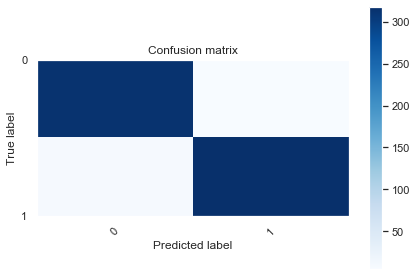

In [140]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_true,predict_neural)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

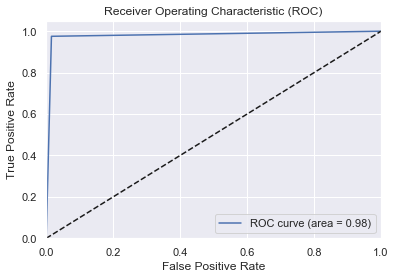

In [141]:
#Plot ROC Curve
plot_roc(predict_neural,y_true)

In [142]:
#Calculate Accuracy
score = metrics.accuracy_score(y_true, predict_neural)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9798449612403101


In [143]:
#Calculate Recall
score = metrics.recall_score(y_true, predict_neural, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9798449612403101


In [144]:
#Calculate Precision
score = metrics.precision_score(y_true, predict_neural, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9798885186558258


In [145]:
#Calculate F1 Score
score = metrics.f1_score(y_true, predict_neural, average= "weighted")
print("F1 score: {}".format(score))

F1 score: 0.9798455426230809


In [146]:
#Calculate Classification Report
print(metrics.classification_report(y_true,predict_neural))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       319
           1       0.98      0.98      0.98       326

    accuracy                           0.98       645
   macro avg       0.98      0.98      0.98       645
weighted avg       0.98      0.98      0.98       645



### Neural Network with 'sigmoid' as activation function and 'sgd' as optimizer 

In [147]:
checkpointer = ModelCheckpoint(filepath=r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_3.hdf5', verbose=0, save_best_only=True)

model = Sequential()
model.add(Dense(44, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(22,activation='sigmoid'))
model.add(Dense(22,activation='sigmoid'))
model.add(Dense(y_train_neural.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    
model.fit(x_train, y_train_neural,validation_data=(x_test,y_test_neural),callbacks=[monitor,checkpointer],verbose=2,epochs=500)

print('Training finished...Loading the best model')  
print()
model.load_weights(r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_3.hdf5')

# Measure accuracy
predict_neural = model.predict(x_test)
predict_neural = np.argmax(predict_neural,axis=1)

y_true = np.argmax(y_test_neural,axis=1)

score = metrics.accuracy_score(y_true, predict_neural)
print("Final accuracy: {}".format(score))

Train on 1502 samples, validate on 645 samples
Epoch 1/500
1502/1502 - 1s - loss: 0.6916 - val_loss: 0.6905
Epoch 2/500
1502/1502 - 0s - loss: 0.6905 - val_loss: 0.6895
Epoch 3/500
1502/1502 - 0s - loss: 0.6899 - val_loss: 0.6888
Epoch 4/500
1502/1502 - 0s - loss: 0.6892 - val_loss: 0.6882
Epoch 5/500
1502/1502 - 0s - loss: 0.6885 - val_loss: 0.6876
Epoch 6/500
1502/1502 - 0s - loss: 0.6883 - val_loss: 0.6869
Epoch 7/500
1502/1502 - 0s - loss: 0.6879 - val_loss: 0.6863
Epoch 8/500
1502/1502 - 0s - loss: 0.6869 - val_loss: 0.6857
Epoch 9/500
1502/1502 - 0s - loss: 0.6864 - val_loss: 0.6852
Epoch 10/500
1502/1502 - 0s - loss: 0.6859 - val_loss: 0.6844
Epoch 11/500
1502/1502 - 0s - loss: 0.6855 - val_loss: 0.6837
Epoch 12/500
1502/1502 - 0s - loss: 0.6846 - val_loss: 0.6830
Epoch 13/500
1502/1502 - 0s - loss: 0.6841 - val_loss: 0.6823
Epoch 14/500
1502/1502 - 0s - loss: 0.6834 - val_loss: 0.6815
Epoch 15/500
1502/1502 - 0s - loss: 0.6824 - val_loss: 0.6811
Epoch 16/500
1502/1502 - 0s - lo

1502/1502 - 0s - loss: 0.1835 - val_loss: 0.1578
Epoch 133/500
1502/1502 - 0s - loss: 0.1808 - val_loss: 0.1550
Epoch 134/500
1502/1502 - 0s - loss: 0.1781 - val_loss: 0.1524
Epoch 135/500
1502/1502 - 0s - loss: 0.1754 - val_loss: 0.1499
Epoch 136/500
1502/1502 - 0s - loss: 0.1730 - val_loss: 0.1475
Epoch 137/500
1502/1502 - 0s - loss: 0.1705 - val_loss: 0.1451
Epoch 138/500
1502/1502 - 0s - loss: 0.1683 - val_loss: 0.1429
Epoch 139/500
1502/1502 - 0s - loss: 0.1660 - val_loss: 0.1407
Epoch 140/500
1502/1502 - 0s - loss: 0.1637 - val_loss: 0.1389
Epoch 141/500
1502/1502 - 0s - loss: 0.1620 - val_loss: 0.1367
Epoch 142/500
1502/1502 - 0s - loss: 0.1599 - val_loss: 0.1348
Epoch 143/500
1502/1502 - 0s - loss: 0.1581 - val_loss: 0.1330
Epoch 144/500
1502/1502 - 0s - loss: 0.1563 - val_loss: 0.1312
Epoch 145/500
1502/1502 - 0s - loss: 0.1547 - val_loss: 0.1296
Epoch 146/500
1502/1502 - 0s - loss: 0.1530 - val_loss: 0.1280
Epoch 147/500
1502/1502 - 0s - loss: 0.1514 - val_loss: 0.1264
Epoch 

[[309  10]
 [  5 321]]


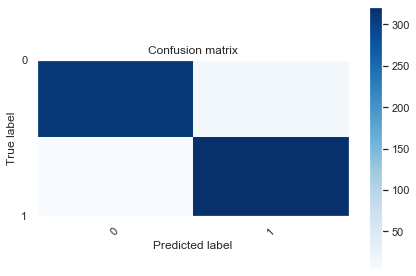

In [148]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_true,predict_neural)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

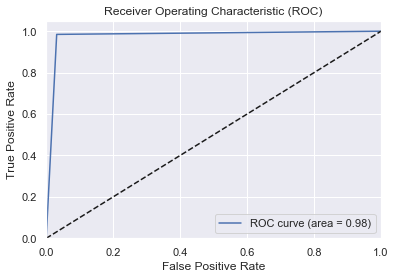

In [149]:
#Plot ROC Curve
plot_roc(predict_neural,y_true)

In [150]:
#Calculate Accuracy
score = metrics.accuracy_score(y_true, predict_neural)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9767441860465116


In [151]:
#Calculate Recall
score = metrics.recall_score(y_true, predict_neural, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9767441860465116


In [152]:
#Calculate Precision
score = metrics.precision_score(y_true, predict_neural, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.976854945065764


In [153]:
#Calculate F1 Score
score = metrics.f1_score(y_true, predict_neural, average= "weighted")
print("F1 score: {}".format(score))

F1 score: 0.9767408308828057


In [154]:
#Calculate Classification Report
print(metrics.classification_report(y_true,predict_neural))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       319
           1       0.97      0.98      0.98       326

    accuracy                           0.98       645
   macro avg       0.98      0.98      0.98       645
weighted avg       0.98      0.98      0.98       645



### Neural Network with 'tanh' as activation function and 'sgd' as optimizer

In [155]:
checkpointer = ModelCheckpoint(filepath=r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_4.hdf5', verbose=0, save_best_only=True)

model = Sequential()
model.add(Dense(44, input_dim=x_train.shape[1], activation='tanh'))
model.add(Dense(22,activation='tanh'))
model.add(Dense(22,activation='tanh'))
model.add(Dense(y_train_neural.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    
model.fit(x_train, y_train_neural,validation_data=(x_test,y_test_neural),callbacks=[monitor,checkpointer],verbose=2,epochs=500)

print('Training finished...Loading the best model')  
print()
model.load_weights(r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_4.hdf5')

# Measure accuracy
predict_neural = model.predict(x_test)
predict_neural = np.argmax(predict_neural,axis=1)

y_true = np.argmax(y_test_neural,axis=1)

score = metrics.accuracy_score(y_true, predict_neural)
print("Final accuracy: {}".format(score))

Train on 1502 samples, validate on 645 samples
Epoch 1/500
1502/1502 - 1s - loss: 0.4847 - val_loss: 0.3636
Epoch 2/500
1502/1502 - 0s - loss: 0.3355 - val_loss: 0.2599
Epoch 3/500
1502/1502 - 0s - loss: 0.2561 - val_loss: 0.1994
Epoch 4/500
1502/1502 - 0s - loss: 0.2090 - val_loss: 0.1632
Epoch 5/500
1502/1502 - 0s - loss: 0.1800 - val_loss: 0.1400
Epoch 6/500
1502/1502 - 0s - loss: 0.1606 - val_loss: 0.1242
Epoch 7/500
1502/1502 - 0s - loss: 0.1472 - val_loss: 0.1130
Epoch 8/500
1502/1502 - 0s - loss: 0.1375 - val_loss: 0.1051
Epoch 9/500
1502/1502 - 0s - loss: 0.1300 - val_loss: 0.0989
Epoch 10/500
1502/1502 - 0s - loss: 0.1241 - val_loss: 0.0945
Epoch 11/500
1502/1502 - 0s - loss: 0.1196 - val_loss: 0.0908
Epoch 12/500
1502/1502 - 0s - loss: 0.1159 - val_loss: 0.0878
Epoch 13/500
1502/1502 - 0s - loss: 0.1129 - val_loss: 0.0857
Epoch 14/500
1502/1502 - 0s - loss: 0.1103 - val_loss: 0.0837
Epoch 15/500
1502/1502 - 0s - loss: 0.1080 - val_loss: 0.0823
Epoch 16/500
1502/1502 - 0s - lo

[[311   8]
 [  7 319]]


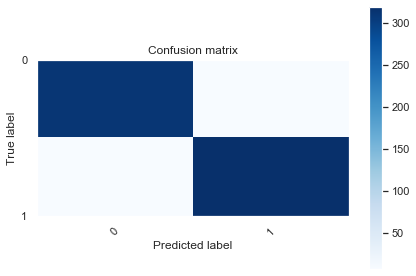

In [156]:
#Plot confusion matrix
import sklearn
cm = sklearn.metrics.confusion_matrix(y_true,predict_neural)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

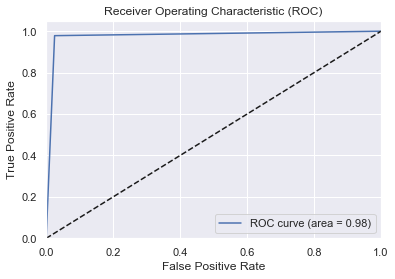

In [157]:
#Plot ROC Curve
plot_roc(predict_neural,y_true)

In [158]:
#Calculate Accuracy
score = metrics.accuracy_score(y_true, predict_neural)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9767441860465116


In [159]:
#Calculate Recall
score = metrics.recall_score(y_true, predict_neural, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9767441860465116


In [160]:
#Calculate Precision
score = metrics.precision_score(y_true, predict_neural, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9767479879894386


In [161]:
#Calculate F1 Score
score = metrics.f1_score(y_true, predict_neural, average= "weighted")
print("F1 score: {}".format(score))

F1 score: 0.9767437387773887


In [162]:
#Calculate Classification Report
print(metrics.classification_report(y_true,predict_neural))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       319
           1       0.98      0.98      0.98       326

    accuracy                           0.98       645
   macro avg       0.98      0.98      0.98       645
weighted avg       0.98      0.98      0.98       645



## CNN

In [163]:
voice_data.shape

(2147, 18)

In [164]:
voice_data_copy

,meanfreq,sd,median,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
3,-1.439009,1.093277,-1.207550,-1.219157,-0.977010,1.578569,1.927413,-1.579440,-1.439009,-1.949748,-1.399563,-1.317902,-1.523257,-0.691975,-1.759182,-1.748697,1.482659
4,-2.085903,1.550858,-2.350139,-1.410087,-0.941488,1.781232,2.250926,-1.260286,-2.085903,-1.346921,-1.458566,-0.141909,-0.439172,-0.691975,-0.079974,-0.070287,0.911377
5,-2.179637,1.577574,-2.540818,-0.204408,-0.038730,1.575256,1.991013,-1.130420,-2.179637,-1.217798,-1.446233,-1.037903,-1.318183,-0.691975,-1.020864,-1.010729,-0.310954
6,-1.457714,1.246289,-1.135778,-0.787271,-0.565916,1.678358,2.130732,-1.543136,-1.457714,-1.362597,-0.825291,-0.141909,-0.933585,-0.691975,-0.138613,-0.128898,-0.328128
8,-1.799999,1.477518,-1.872919,-1.412157,-1.001312,1.752305,2.178708,0.537874,-1.799999,-1.681268,-1.388679,-1.317902,-1.237076,-0.691975,-1.212773,-1.202548,0.028952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,-1.648034,2.420980,-0.336689,-0.998510,-0.763167,1.242315,1.540326,0.481174,-1.648034,1.739030,0.078938,0.506915,-0.818597,-0.691975,-0.930240,-0.920148,1.656274
3163,-2.215889,1.914292,-1.354979,-0.451571,-0.419917,1.569453,2.133857,0.251853,-2.215889,1.294679,3.093572,-0.450366,-0.184565,-0.691975,-0.514436,-0.504542,0.229796
3165,-1.807355,2.633903,-0.326498,-0.285707,-0.425793,1.191954,1.508004,-2.767430,-1.807355,2.232758,0.078938,0.506915,-0.902522,-0.691975,-0.948897,-0.938797,0.712613
3166,-1.742998,2.297642,-0.283853,-0.699647,-0.701993,1.276049,1.630167,0.429819,-1.742998,0.934546,-0.263190,-1.317902,-0.272635,-0.691975,-0.725003,-0.715010,2.422164


In [165]:
voice_data

,meanfreq,sd,median,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,-1.439009,1.093277,-1.207550,-1.219157,-0.977010,1.578569,1.927413,-1.579440,-1.439009,-1.949748,-1.399563,-1.317902,-1.523257,-0.691975,-1.759182,-1.748697,1.482659,1
4,-2.085903,1.550858,-2.350139,-1.410087,-0.941488,1.781232,2.250926,-1.260286,-2.085903,-1.346921,-1.458566,-0.141909,-0.439172,-0.691975,-0.079974,-0.070287,0.911377,1
5,-2.179637,1.577574,-2.540818,-0.204408,-0.038730,1.575256,1.991013,-1.130420,-2.179637,-1.217798,-1.446233,-1.037903,-1.318183,-0.691975,-1.020864,-1.010729,-0.310954,1
6,-1.457714,1.246289,-1.135778,-0.787271,-0.565916,1.678358,2.130732,-1.543136,-1.457714,-1.362597,-0.825291,-0.141909,-0.933585,-0.691975,-0.138613,-0.128898,-0.328128,1
8,-1.799999,1.477518,-1.872919,-1.412157,-1.001312,1.752305,2.178708,0.537874,-1.799999,-1.681268,-1.388679,-1.317902,-1.237076,-0.691975,-1.212773,-1.202548,0.028952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,-1.648034,2.420980,-0.336689,-0.998510,-0.763167,1.242315,1.540326,0.481174,-1.648034,1.739030,0.078938,0.506915,-0.818597,-0.691975,-0.930240,-0.920148,1.656274,0
3163,-2.215889,1.914292,-1.354979,-0.451571,-0.419917,1.569453,2.133857,0.251853,-2.215889,1.294679,3.093572,-0.450366,-0.184565,-0.691975,-0.514436,-0.504542,0.229796,0
3165,-1.807355,2.633903,-0.326498,-0.285707,-0.425793,1.191954,1.508004,-2.767430,-1.807355,2.232758,0.078938,0.506915,-0.902522,-0.691975,-0.948897,-0.938797,0.712613,0
3166,-1.742998,2.297642,-0.283853,-0.699647,-0.701993,1.276049,1.630167,0.429819,-1.742998,0.934546,-0.263190,-1.317902,-0.272635,-0.691975,-0.725003,-0.715010,2.422164,0


In [166]:
x_train_cnn = np.expand_dims(x_train, axis=2)
x_test_cnn = np.expand_dims(x_test, axis=2)
x_train_cnn.shape

(1502, 17, 1)

In [167]:
x_test_cnn.shape

(645, 17, 1)

In [168]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import keras

Using TensorFlow backend.


In [169]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters = 10, kernel_size = 100 , strides = 1, padding='same',use_bias = True, activation = 'relu', input_shape=(x_train_cnn.shape[1],1)))
cnn_model.add(MaxPooling1D(pool_size=(8)))
cnn_model.add(Flatten())
cnn_model.add(Dense(400, activation ='relu', use_bias=True))
cnn_model.add(Dense(150, activation ='relu', use_bias=True))
cnn_model.add(Dense(7, activation='softmax', use_bias=True))
opt = keras.optimizers.Adam(lr=0.0001)
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 17, 10)            1010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 10)             0         
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 400)               8400      
_________________________________________________________________
dense_18 (Dense)             (None, 150)               60150     
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 1057      
Total params: 70,617
Trainable params: 70,617
Non-trainable params: 0
__________________________________________________

In [170]:
checkpointer = ModelCheckpoint(filepath=r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_cnn_1.hdf5', verbose=0, save_best_only=True) # save best model

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
cnn_model.fit(x_train_cnn, y_train, batch_size=16, epochs=100, validation_data=(x_test_cnn, y_test))

Train on 1502 samples, validate on 645 samples
Epoch 1/100
1502/1502 [==============================] - 2s 1ms/sample - loss: 0.6012 - acc: 0.7523 - val_loss: 0.2411 - val_acc: 0.9101
Epoch 2/100
1502/1502 [==============================] - 2s 1ms/sample - loss: 0.1784 - acc: 0.9348 - val_loss: 0.1694 - val_acc: 0.9271
Epoch 3/100
1502/1502 [==============================] - 2s 2ms/sample - loss: 0.1337 - acc: 0.9554 - val_loss: 0.1088 - val_acc: 0.9550
Epoch 4/100
1502/1502 [==============================] - 2s 1ms/sample - loss: 0.1022 - acc: 0.9667 - val_loss: 0.1088 - val_acc: 0.9659
Epoch 5/100
1502/1502 [==============================] - 2s 1ms/sample - loss: 0.0983 - acc: 0.9640 - val_loss: 0.1286 - val_acc: 0.9550
Epoch 6/100
1502/1502 [==============================] - 1s 910us/sample - loss: 0.1081 - acc: 0.9614 - val_loss: 0.0893 - val_acc: 0.9721
Epoch 7/100
1502/1502 [==============================] - 1s 809us/sample - loss: 0.0672 - acc: 0.9767 - val_loss: 0.0894 - val_ac

In [171]:
cnn_model_pred = cnn_model.predict(x_test_cnn)

In [172]:
cnn_model_pred = cnn_model_pred.argmax(axis=1)

In [173]:
cnn_model_pred = cnn_model_pred.astype(int).flatten()

[[313   6]
 [ 12 314]]


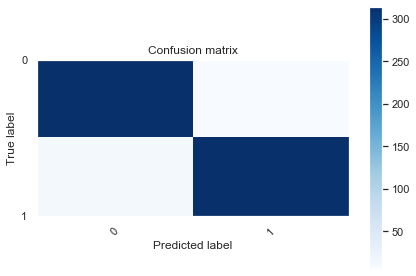

In [174]:
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test,cnn_model_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])
plt.grid(False)

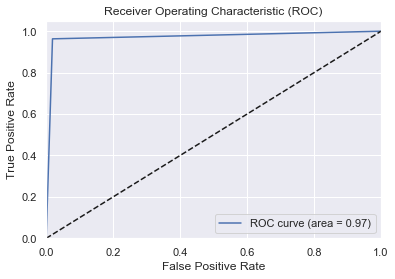

In [175]:
#Plot ROC curve
plot_roc(cnn_model_pred, y_test)

In [176]:
#Calculate Accuracy
score = metrics.accuracy_score(y_test, cnn_model_pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9720930232558139


In [177]:
#Calculate Precision
score = metrics.precision_score(y_test, cnn_model_pred, average="weighted")
print("Precision score: {}".format(score))

Precision score: 0.9722620751341681


In [178]:
#Calculate Recall
score = metrics.recall_score(y_test, cnn_model_pred, average="weighted")
print("Recall score: {}".format(score))

Recall score: 0.9720930232558139


In [179]:
#Calculate F1 Score
score = metrics.f1_score(y_test, cnn_model_pred, average="weighted")
print("F1 score: {}".format(score))

F1 score: 0.972093425737066


In [180]:
#Calculate Classification Report
print(metrics.classification_report(y_test,cnn_model_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       319
           1       0.98      0.96      0.97       326

    accuracy                           0.97       645
   macro avg       0.97      0.97      0.97       645
weighted avg       0.97      0.97      0.97       645

